<a href="https://colab.research.google.com/github/matteoorlandi5/machine_learning_project/blob/master/Matteo_Orlandi_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST DATASET**

## INTRODUCTION

MNIST (Modified National Institute of Standards and Technology) is a dataset of handwritten digits widely used as a baseline for testing image processing systems. This dataset was constructed by re-mixing the samples from the NIST's Special Database 3 (training set) and from the Special Database 1 (testing set) which contain binary images of handwritten digits as well. As a matter of fact, the MNIST database contains 60,000 training images and 10,000 testing images: half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. Each sample is a small square 28×28 pixel grayscale image of digits ranging from 0 to 9.


The aim of this project is to develop a model that is able to classify images in the [0-9] range. For this purpose, I will inspect the structure and the main features of the dataset and I will use different machine learning methods to reach a high accurate classification level.   

## DATA UPLOAD

In order to upload the dataset, I used the `keras.dataset` module, where `keras` is a powerful deep learning library that runs on top of other open-source machine learning libraries such as `TensorFlow`, which is also open-source itself. The `dataset` module provides datasets already-vectorized, in Numpy format, that can be used for creating code examples.

In [20]:
import tensorflow as tf
from tensorflow import keras

Some other important libraries are imported for further data analysis and plot generation.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Here I uploaded the data through `Keras` by defining the training and testing datasets. 

In [22]:
(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.mnist.load_data()

## DATA INSPECTION AND DATA VISUALIZATION

The total number of examples is 70,000: 60,000 are the training examples and 10,000 are the testing examples. Each of them is a vector composed of 784 (28x28) pixels with associated a label representing the expected digit. 

In [23]:
print(images_train.dtype,"NumPy array of grayscale image data containing the training data with shape:", images_train.shape)
print(labels_train.dtype,"NumPy array of digit labels (integers in range 0-9) for the training data with shape:", labels_train.shape)
print(images_test.dtype,"NumPy array of grayscale image data containing the testing data with shape:", images_test.shape)
print(labels_test.dtype,"NumPy array of digit labels (integers in range 0-9) for the testing data with shape:", labels_test.shape)
print("Single image shape:", images_train[0].shape)

uint8 NumPy array of grayscale image data containing the training data with shape: (60000, 28, 28)
uint8 NumPy array of digit labels (integers in range 0-9) for the training data with shape: (60000,)
uint8 NumPy array of grayscale image data containing the testing data with shape: (10000, 28, 28)
uint8 NumPy array of digit labels (integers in range 0-9) for the testing data with shape: (10000,)
Single image shape: (28, 28)


With `matplotlib` I showed 16 digit images belonging to the training set. 

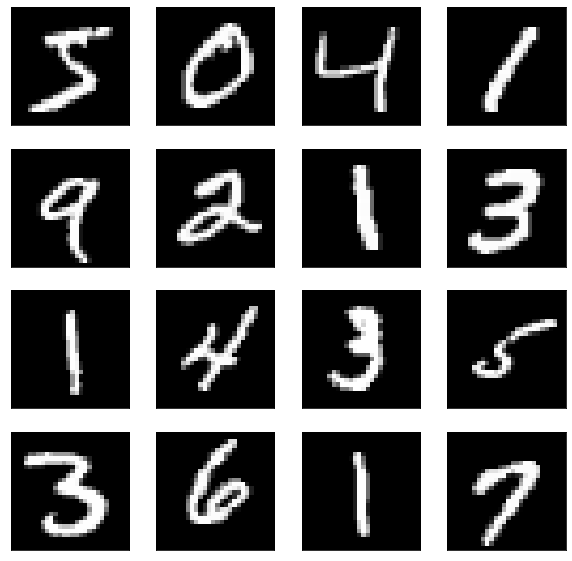

In [24]:
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images_train[i], cmap="gray")
plt.show()

Classification predictive modeling can be performed both in balanced and imbalanced datasets. Imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. It can pose a challenge for predictive modeling resulting in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class. 

However, this is not the case. As a matter of fact, the classes seem to be similarly abundant (left panel). 

I also plotted the class distribution of the testing set (right panel) for a better understanding of that dataset. 

[Text(0, 0.5, 'digit_classes counts'), Text(0.5, 0, 'digit_classes')]

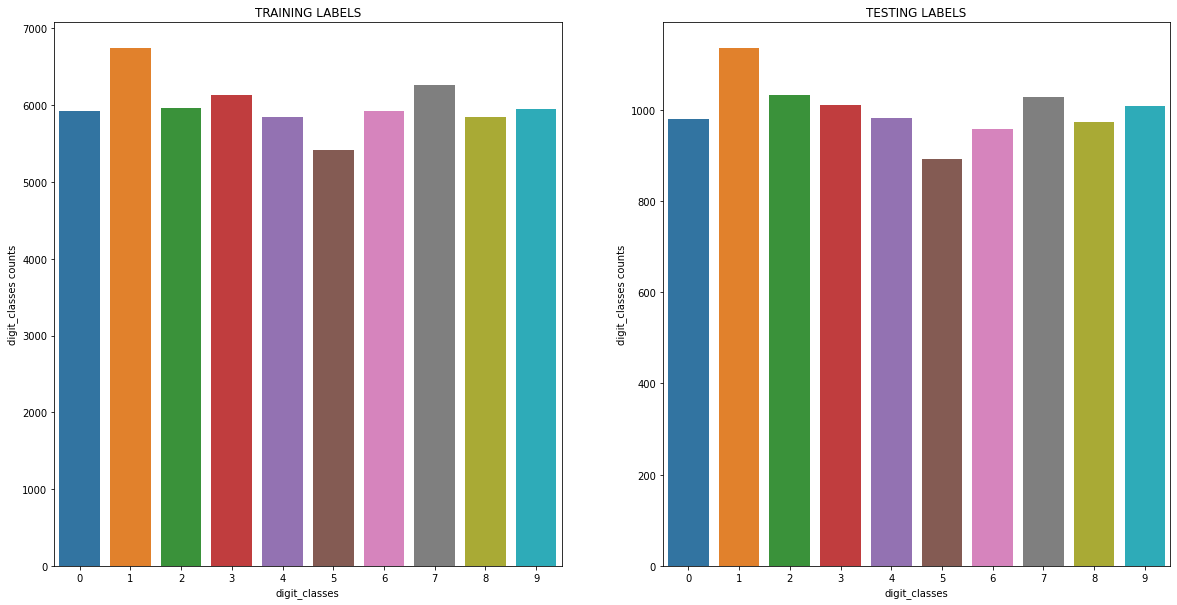

In [25]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
count_plot_train = sns.countplot(x=labels_train)
plt.title("TRAINING LABELS")
count_plot_train.set(xlabel='digit_classes', ylabel='digit_classes counts')

plt.subplot(1, 2, 2)
count_plot_test = sns.countplot(x=labels_test)
plt.title("TESTING LABELS")
count_plot_test.set(xlabel='digit_classes', ylabel='digit_classes counts')


As already introduced, each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels. Each pixel has a single pixel-value associated, indicating the lightness or darkness of that pixel: higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

I plotted the pixel distribution for the first 16 images. As expected, most of the pixels have values near to zero (black pixels). Values higher than zero represent gray pixels or withe pixels (in case of a value of 255). 

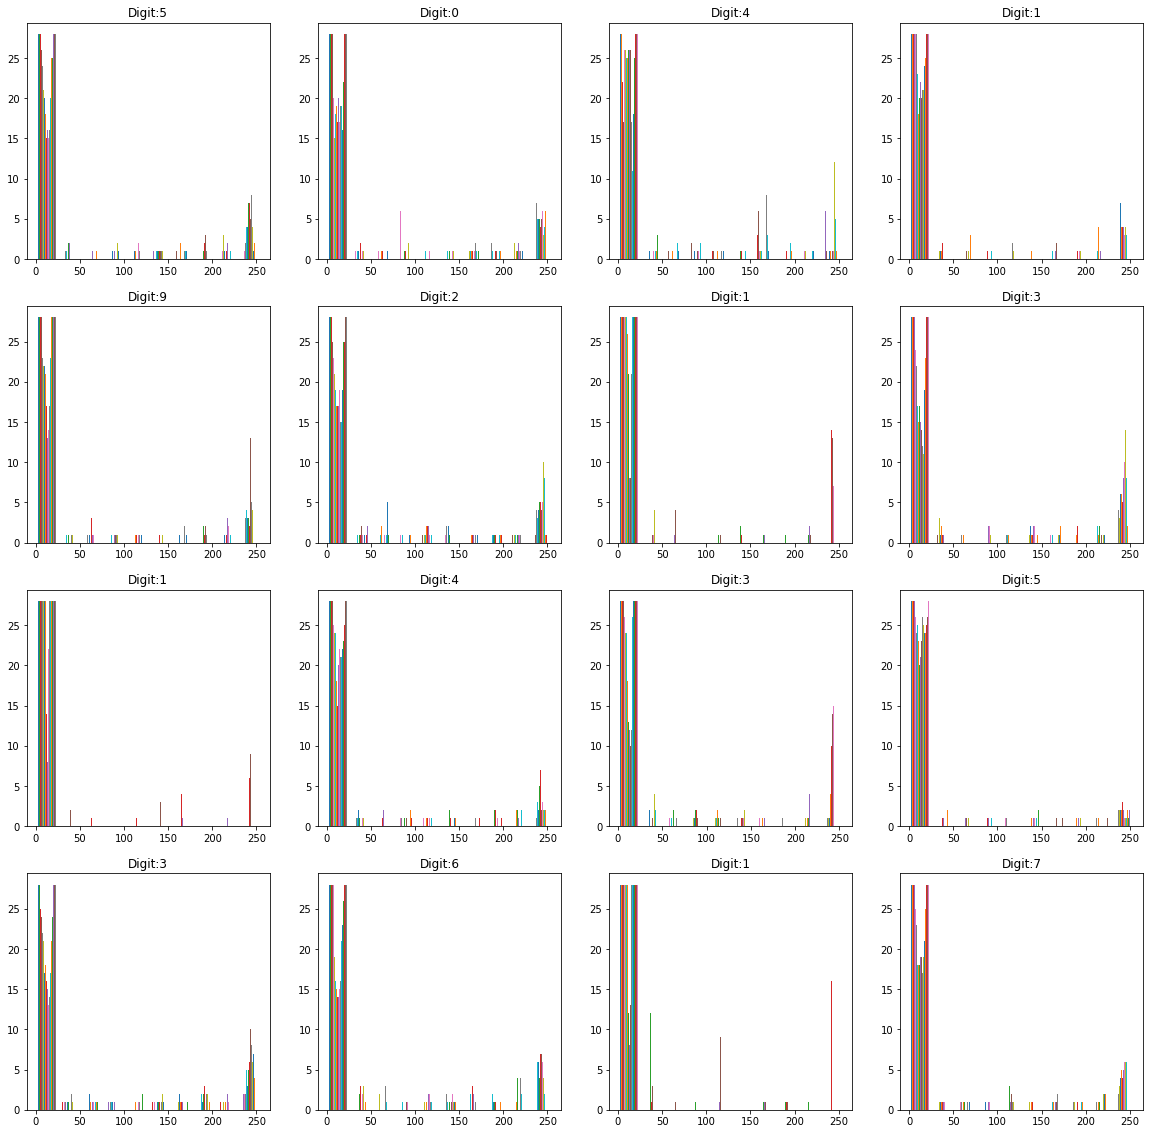

In [26]:
plt.figure(figsize=(20,20))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.hist(images_train[i])
  plt.title(f'Digit:{labels_train[i]}')
plt.show()

## DATA RESHAPING

For the generation of the models (eg; decision tree models) it is advisable to reshape and flat the data, since the algorithm expects in input an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples.

In [27]:
reshaped_images_train=images_train.flatten().reshape(60000,784)
reshaped_images_test=images_test.flatten().reshape(10000,784)
print("Reshaped training data:", "\n", reshaped_images_train, "\n", "New shape:", reshaped_images_train.shape, "\n")
print("Reshaped testing data:", "\n", reshaped_images_test, "\n", "New shape:", reshaped_images_test.shape)

Reshaped training data: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 
 New shape: (60000, 784) 

Reshaped testing data: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 
 New shape: (10000, 784)


## DECISION TREE

Decision Trees are non-parametric supervised learning methods used both for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In general, decision trees are simple to understand and interpret. Moreover, they require little data preparation with respect to other techniques that often require data normalization and they are relatively fast.
On the other side, decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem. In addition, decision tree learners can create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior if it is not already balanced.


### Tree depth tuning

The theoretical maximum depth of a decision tree is one less than the number of training samples. However, reaching such a level is not only useless, but counterproductive. As a matter of fact, that would lead to overfitting.

In general, the deeper you allow your tree to grow, the more complex your model will become as the algorithm is capturing more information about the data. This is one of the root causes of overfitting in decision trees because the model will end up to perfectly fit the training data and it will not be able to generalize on the test set.

In [28]:
from sklearn import tree
from sklearn.metrics import accuracy_score

DT_accuracy = []
for i in range(20):
  DT_model = tree.DecisionTreeClassifier(max_depth=i+1, random_state=0)
  DT_model.fit(reshaped_images_train,labels_train)
  DT_predictions = DT_model.predict(reshaped_images_test)
  DT_accuracy.append(accuracy_score(labels_test, DT_predictions))
  print("Accuracy with a depth of",(i+1),":", accuracy_score(labels_test, DT_predictions))

Accuracy with a depth of 1 : 0.1994
Accuracy with a depth of 2 : 0.3447
Accuracy with a depth of 3 : 0.4953
Accuracy with a depth of 4 : 0.5957
Accuracy with a depth of 5 : 0.6747
Accuracy with a depth of 6 : 0.7416
Accuracy with a depth of 7 : 0.7853
Accuracy with a depth of 8 : 0.8186
Accuracy with a depth of 9 : 0.8501
Accuracy with a depth of 10 : 0.8657
Accuracy with a depth of 11 : 0.8748
Accuracy with a depth of 12 : 0.8785
Accuracy with a depth of 13 : 0.8805
Accuracy with a depth of 14 : 0.8822
Accuracy with a depth of 15 : 0.882
Accuracy with a depth of 16 : 0.8816
Accuracy with a depth of 17 : 0.8822
Accuracy with a depth of 18 : 0.8802
Accuracy with a depth of 19 : 0.8814
Accuracy with a depth of 20 : 0.8796


From the accuracy values listed above, it can be seen that a plateau (image below) is reached after a depth of 14. In detail, some accuracy values with trees deeper than 14 decrease their accuracy. There is therefore no reason to choose a tree deeper than 14.

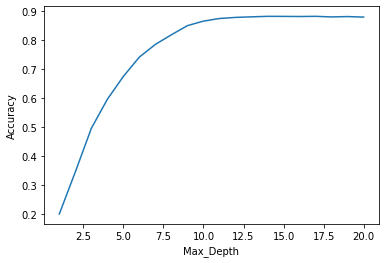

In [29]:
plt.plot(list(range(1,21)), DT_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Max_Depth')
plt.grid(False)

I proceed with the training and testing steps using a maximum depth of 14.

In [30]:
from sklearn import tree
DT_model_final = tree.DecisionTreeClassifier(max_depth=14, random_state=0)
DT_model_final.fit(reshaped_images_train,labels_train)

DecisionTreeClassifier(max_depth=14, random_state=0)

I tried to generate a tree image, however it is hard to read and takes a long time to generate. For this reason I left the commands commented.

In [31]:
#DT_image=DT_model_final.fit(reshaped_images_train,labels_train)
#tree.plot_tree(DT_image)
#plt.show()

Finally, I evaluated the model using a confusion matrix. It is a table that helps to summarize prediction results of a classification model. It gives insight not only on the errors made by the classifier, but also on the types of errors that are being made. 

In [32]:
from sklearn.metrics import classification_report
DT_predictions_final = DT_model_final.predict(reshaped_images_test)
print(f'Classification Report \n {classification_report(labels_test,DT_predictions_final)}')

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.85      0.85      0.85      1010
           4       0.87      0.88      0.88       982
           5       0.84      0.85      0.85       892
           6       0.90      0.88      0.89       958
           7       0.91      0.91      0.91      1028
           8       0.83      0.80      0.82       974
           9       0.86      0.86      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



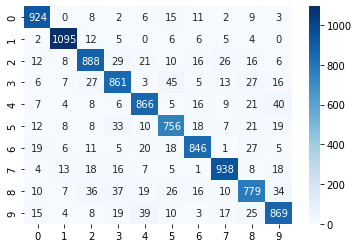

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
DT_matrix = confusion_matrix(labels_test, DT_predictions_final)
sns.heatmap(DT_matrix, annot=True, fmt="d", cmap="Blues")

In [34]:
DT_accuracy_final=accuracy_score(labels_test,DT_predictions_final)
print("Accuracy:", DT_accuracy_final)

Accuracy: 0.8822


From the confusion matrix it is clear that most of the digits were correctly predicted by the model. However, some numbers have been misclassified like:
 

*   digit 5 has been confused with digit 3;
*   digit 9 has been confused with digit 4.

At the same time, number 1 or 0 have a low misclassification rate. 

This is probably due to the fact that similar numbers (images of 5 and 3 could be confusing if handwritten and represented in "low" resolution), while graphically different numbers are less likely to be misclassified.

In conclusion, I can be satisfied with the accuracy result obtained with this method. I will try to get a better result later.

## RANDOM FOREST

Random forest is a machine learning technique that is used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. 

In fact, a random forest algorithm consists of many decision trees and it establishes the outcome based on the predictions of the decision trees. It predicts by applying the majority voting rule on the output of various trees. 

This method can be considered less prone to overfitting compared to using a single decision tree, as the dataset is randomly divided into sub-datasets used to instruct numerous trees.

In [35]:
from sklearn.ensemble import RandomForestClassifier



In a similar way with respect to the decision tree depth, I tuned the number of trees in the forest (n_estimators), which is one of the most important hyperparameters that allows for the best performance and, at the same time, to avoid overfitting.

I computed the accuracy of the model using 100, 200, 300 and 400 estimators: the best model was selected for further analysis.


In [36]:
RF_accuracy = []
for i in range(100,500,100):
  RF_model = RandomForestClassifier(n_estimators=i, random_state=0)
  RF_model.fit(reshaped_images_train,labels_train)
  RF_predictons = RF_model.predict(reshaped_images_test)
  RF_accuracy.append(accuracy_score(labels_test, RF_predictons))
  print("Accuracy with", (i), "number of estimators :", accuracy_score(labels_test, RF_predictons))

Accuracy with 100 number of estimators : 0.9705
Accuracy with 200 number of estimators : 0.9712
Accuracy with 300 number of estimators : 0.9703
Accuracy with 400 number of estimators : 0.9711


The generated models show oscillatory accuracy depending on the number of estimators used. The highest accuracy value was achieved by the model with 200 estimators (image below), so I proceed with that.

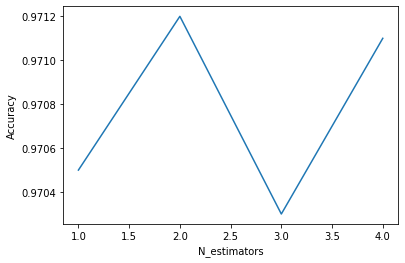

In [37]:
plt.plot(list(range(1,5)), RF_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('N_estimators')
plt.grid(False)

I proceed with the training and testing steps using 200 estimators.

In [38]:
RF_model_final = RandomForestClassifier(n_estimators=200, random_state=0)
RF_model_final.fit(reshaped_images_train,labels_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [39]:
RF_predictions_final = RF_model_final.predict(reshaped_images_test)
print(f'Classification Report \n {classification_report(labels_test,RF_predictions_final)}')

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



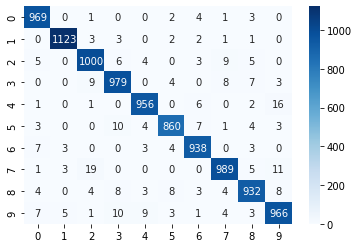

In [40]:
RF_matrix = confusion_matrix(labels_test, RF_predictions_final)
sns.heatmap(RF_matrix, annot=True, fmt="d", cmap="Blues")

In [41]:
RF_accuracy_final=accuracy_score(labels_test,RF_predictions_final)
print('Accuracy:', RF_accuracy_final)

Accuracy: 0.9712


In a similar way with respect to the decision tree, from the confusion matrix it is clear that most of the digits were correctly predicted by the model. However, again, some numbers have been misclassified like:

*   digit 2 has been confused with digit 7;
*   digit 9 has been confused with digit 4.

At the same time, number 1 or 0 have a low misclassification rate.

Numbers that are most misclassified or with a very low rate of misclassification are very consistent with the previous model. This underlines how similar numbers are more likely to be confused than very different numbers from a graphical point of view.

Again, the level of accuracy is very high.

#K-nearest Neighbors

The k-nearest neighbors (KNN) is a supervised machine learning algorithm. The k-nearest neighbors (KNN) is a supervised machine learning algorithm that can be used to solve both classification and regression problems. It is based on the assumption that similar data are distributed close to each other. Therefore, the distribution can be easily identified by calculating the distance between points on a graph: "*Tell me who your neighbors are, and I’ll tell you who you are*".

In order to achieve a good classification it may be necessary to set the number of neighbouring points to consider when creating groups, by allowing the algorithm to distinguish and group them according to this sub-distribution. In general, it can be used to solve both classification and regression problems. 

In [42]:
from sklearn.neighbors import KNeighborsClassifier 

As already done for other algorithms, I have adjusted the tested parameter K, which allows to obtain the best performance and, at the same time, to avoid overfitting.

I calculated the accuracy of the model using up to 15 neighbors (it is advisable to use an odd number in these settings with an even number of classes), then the best model was selected for further analysis.

In [43]:
K_accuracy=[]
for k in range(1, 30, 2):
  K_model = KNeighborsClassifier(n_neighbors=k)
  K_model.fit(reshaped_images_train,labels_train)
  K_predictons = K_model.predict(reshaped_images_test)
  K_accuracy.append(accuracy_score(labels_test, K_predictons))
  print("Accuracy with", (k), "number of  neighbors:", accuracy_score(labels_test, K_predictons))

Accuracy with 1 number of  neighbors: 0.9691
Accuracy with 3 number of  neighbors: 0.9705
Accuracy with 5 number of  neighbors: 0.9688
Accuracy with 7 number of  neighbors: 0.9694
Accuracy with 9 number of  neighbors: 0.9659
Accuracy with 11 number of  neighbors: 0.9668
Accuracy with 13 number of  neighbors: 0.9653
Accuracy with 15 number of  neighbors: 0.9633
Accuracy with 17 number of  neighbors: 0.963
Accuracy with 19 number of  neighbors: 0.9632
Accuracy with 21 number of  neighbors: 0.963
Accuracy with 23 number of  neighbors: 0.9619
Accuracy with 25 number of  neighbors: 0.9609
Accuracy with 27 number of  neighbors: 0.9604
Accuracy with 29 number of  neighbors: 0.9593



The generated models appear to increase accuracy to K = 5, then begin to decline (while maintaining high accuracy). The highest accuracy value was achieved by the model K = 5 (image below), so I proceed with that.

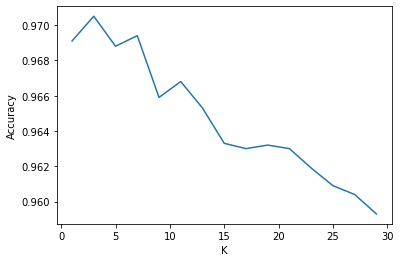

In [44]:
plt.plot(list(range(1,30,2)), K_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.grid(False)

I proceed with the training and testing steps using K = 5.

In [45]:
K_model_final = KNeighborsClassifier(n_neighbors=3)
K_model_final.fit(reshaped_images_train,labels_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
K_predictions_final = K_model_final.predict(reshaped_images_test)
print(f'Classification Report \n {classification_report(labels_test,K_predictions_final)}')

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



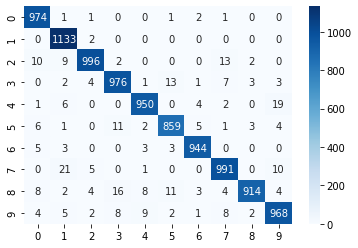

In [47]:
K_matrix = confusion_matrix(labels_test, K_predictions_final)
sns.heatmap(K_matrix, annot=True, fmt="d", cmap="Blues")

In [48]:
K_accuracy_final=accuracy_score(labels_test,K_predictions_final)
print('Accuracy:', K_accuracy_final)

Accuracy: 0.9705


As observed for previous models, most of the numbers were correctly predicted, small problems were found in "similar" numbers, such as:

*   digit 1 has been confused with digit 7;
*   digit 3 has been confused with digit 8;

As already mentioned for the other algorithms, the misclassification rate is very low. Therefore, the level of accuracy is very high.

## Cross Validation

Cross validation is one of the techniques used to test the effectiveness of a machine learning model. In fact, it is useful to assure that the generated model has got most of the patterns from the data correct, and that it is not picking up too much of the noise losing its generalization capabilities (overfitting).

In particular, I used the k-Fold Cross-Validation procedure, which is a resampling procedure used to evaluate machine learning models on a limited data sample.

The parameter k refers to the  number of groups that a given data sample is to be split into. The model is trained using all but one subset (k-1) and it is evaluated on the dataset not used for training. 

I used one of the most basic k-fold Cross-Validation by splitting the dataset into 5 subsets both for the decision tree model and the random forest model. 

In [49]:
from sklearn.model_selection import cross_val_score

x = np.vstack((reshaped_images_test, reshaped_images_train))
y = np.concatenate((labels_test, labels_train))
RF_score = cross_val_score(RF_model_final, x,y,cv=5, scoring="accuracy")
DT_score = cross_val_score(DT_model_final, x,y,cv=5, scoring="accuracy")
K_score = cross_val_score(K_model_final, x,y,cv=5, scoring="accuracy")
print("CV accuracy for decision tree: ",np.mean(DT_score))
print("CV accuracy for random forest: ",np.mean(RF_score))
print("CV accuracy for K-nearest Neighbors: ",np.mean(K_score))

CV accuracy for decision tree:  0.8754285714285714
CV accuracy for random forest:  0.969057142857143
CV accuracy for K-nearest Neighbors:  0.9708285714285715


As the accuracy levels obtained for all the three models are similar to the ones obtained in a "simple" train/test split, I can conclude that the models are not overfitted.

## CONVOLUTIONAL NEURAL NETWORK

Convolutional neural network (CNN) is a  class of artificial neural network often used for image classification.

The innovation of CNN is the ability to automatically and adaptively learn spatial hierarchies of features (e.g. images) by converting them into lower dimension without losing their characteristics.

CNN can be considered a mathematical construct that is typically composed of three main types of layers: 

1. convolutional layer, it is the first layer that is used to extract the various features from the input images. In particular, convolution is a mathematical operation between two inputs, such as an image matrix and a filter or kernel. The output is termed as the Feature map which gives us information about the image such as the corners and edges;

2. pooling layer, which aims to progressively reduce the number of parameters and computational process. The main idea behind a pooling layer is to “accumulate” features from maps generated by convolving a filter over an image. This can be useful to avoid overfitting;

3. fully connected layer, in which the input (matrix) is flattened into a vector and deed it into a fully connected layer like a neural network. 

I uploaded some useful libraries for the model generation.
Before to start the model generation, the data must be manipulated to allow the CNN to converge faster.


In [50]:
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input

## Data manipulation


Data manipulation is a crucial step to allow CNN to converge faster and to provide data in a proper shape.

As a matter of fact, I converted all values into floats and I rescaled the pixel range [0-255] into smaller values [0-1]. 

In [51]:
images_train = images_train.astype("float32")
images_test = images_test.astype("float32")
images_train = images_train / 255.0
images_test = images_test / 255.0

I also reshaped the input array dimensions to create a suitable format for keras API.

In [52]:
images_train = images_train.reshape((60000,28,28,1))
images_test = images_test.reshape((10000,28,28,1))

The last thing I did was the generation of the one-hot encoding. With this method the label data need to be converted into categorical formats (e.g. label ‘3’ should be converted to a vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] for model building).

In [53]:
from tensorflow.keras.utils import to_categorical 

labels_train=tf.keras.utils.to_categorical(labels_train)
labels_test=tf.keras.utils.to_categorical(labels_test)

## Basic CNN model

I started the CNN model generation by defining a basic architecture. 

In fact, the model is composed by:
1.  a convolutional layer together with the ReLU activation function. The purpose of applying the ReLU function is to increase the non-linearity in our images, as images are naturally non-linear;
2. a pooling layer useful for downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the input;
3. a flatten layer that collapses the spatial dimensions into a 1-dimensional array for inputting it to the next layer;
4. two dense/fully connected layers which are the network layers in the model. The last layer has the SoftMax activation function, which is popularly used for multiclass classification problems.

In [54]:
NN_model_basic = Sequential()
NN_model_basic.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
NN_model_basic.add(MaxPool2D((2, 2)))
NN_model_basic.add(Flatten())
NN_model_basic.add(Dense(100, activation='relu'))
NN_model_basic.add(Dense(10, activation='softmax'))

NN_model_basic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

With the `plot_model` function we can have a more sophisticated representation of the model. Here is reported all the information of the network as well as the data flow through the network. 

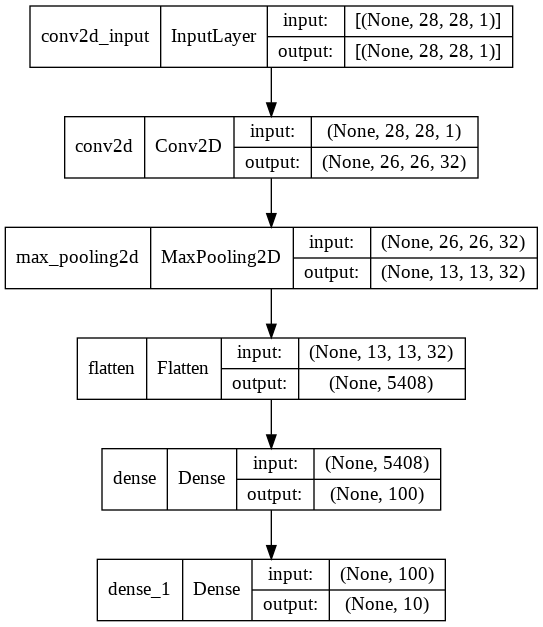

In [55]:
from keras.utils.vis_utils import plot_model
plot_model(NN_model_basic, show_shapes=True, show_layer_names=True)

After that the architecture is defined, the model needs to be compiled. `adam` is an optimizer that adjusts the learning rate during the training process. Then, I used the `categorical_crossentropy` loss function as it is a multi-class classification problem and, since all the labels carry similar weight, I preferred accuracy as performance metric.

In [56]:
NN_model_basic.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

At this point, I trained the model with training data.

I also specified the hyperparameters batch size and epochs: the first defines the number of samples to work through before updating the internal model parameters, the second defines the number times that the learning algorithm will work through the entire training dataset. 

Lastly, the validation datasets have been specified. 

In [57]:
history=NN_model_basic.fit(images_train,
                  labels_train,
                  epochs=25,
                  batch_size=256,
                  validation_data=(images_test,labels_test))

Epoch 1/25
235/235 [==============================] - 16s 12ms/step - loss: 0.3033 - accuracy: 0.9171 - val_loss: 0.1027 - val_accuracy: 0.9686
Epoch 2/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0885 - accuracy: 0.9747 - val_loss: 0.0715 - val_accuracy: 0.9788
Epoch 3/25
235/235 [==============================] - 2s 11ms/step - loss: 0.0602 - accuracy: 0.9825 - val_loss: 0.0555 - val_accuracy: 0.9819
Epoch 4/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0464 - accuracy: 0.9863 - val_loss: 0.0504 - val_accuracy: 0.9837
Epoch 5/25
235/235 [==============================] - 3s 11ms/step - loss: 0.0376 - accuracy: 0.9892 - val_loss: 0.0488 - val_accuracy: 0.9837
Epoch 6/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0313 - accuracy: 0.9909 - val_loss: 0.0454 - val_accuracy: 0.9852
Epoch 7/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0246 - accuracy: 0.9927 - val_loss: 0.0471 - val_accuracy: 0.985

From the graphs below it is possible to see how, despite the accuracy obtained is very high, the model is prone to overfitting.

This can be seen from the fact that although the train loss decreases steadily, the validation loss increases or stops decreasing. At the same time, a similar but opposite trend is observable for accuracy.

This is because the model carries with it the noise of the training data.

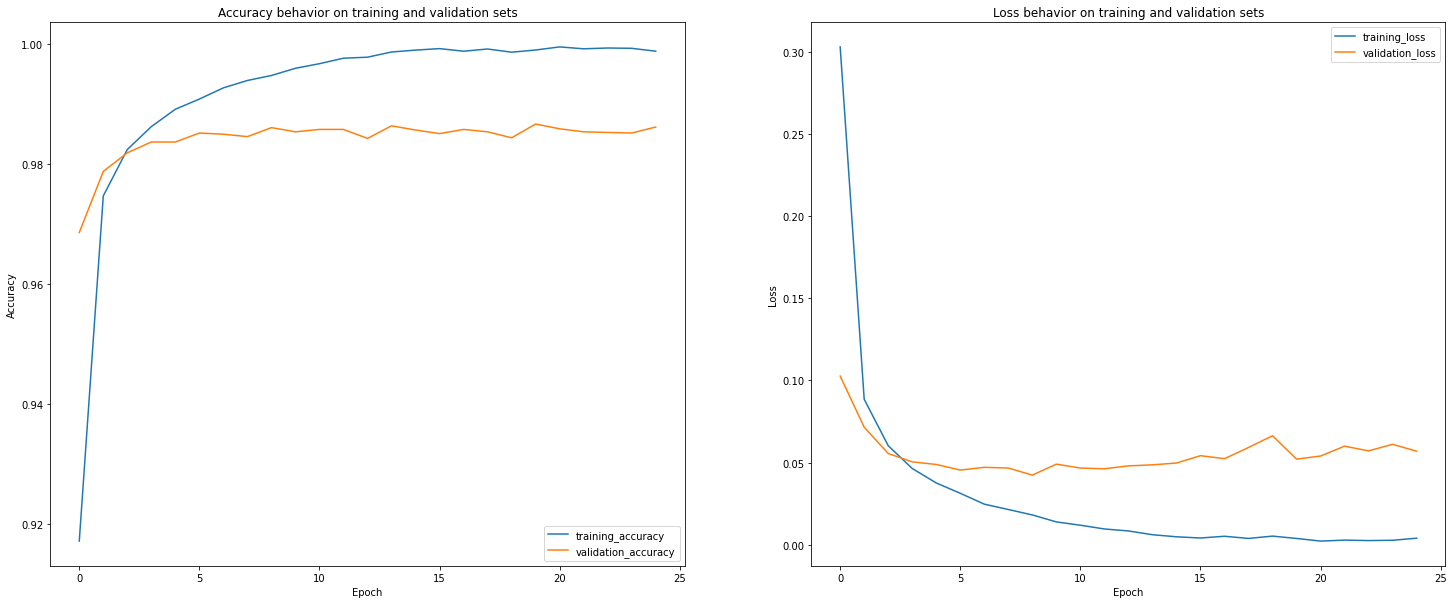

In [58]:
fig=plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["training_accuracy", "validation_accuracy"], loc="lower right")
plt.title('Accuracy behavior on training and validation sets')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend([ "training_loss", "validation_loss"], loc="upper right")
plt.title('Loss behavior on training and validation sets')

plt.show()

I also produced the confusion matrix to show that, despite overfitting, the model's ability to recognize handwritten numbers is high.

Again, the confusing numbers mostly concern digits with similar writing (4 with 9 and 3 with 5).

Accuracy: 0.9862


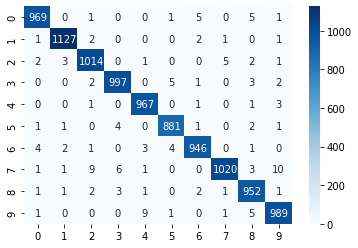

In [59]:
NN_pred_basic = NN_model_basic.predict(images_test)
CNN_pred_basic=list()
CNN_lab_basic=list()
for i in range(len(NN_pred_basic)):
    CNN_pred_basic.append(np.argmax(NN_pred_basic[i]))
for i in range(len(labels_test)):
    CNN_lab_basic.append(np.argmax(labels_test[i]))

CNN_matrix_basic = confusion_matrix(CNN_pred_basic, CNN_lab_basic)
sns.heatmap(CNN_matrix_basic, annot=True, fmt="d", cmap="Blues")
CNN_accuracy_basic=accuracy_score(CNN_pred_basic,CNN_lab_basic)
print('Accuracy:', CNN_accuracy_basic)

## Advanced CNN model

Despite the good results obtained with the basic model, I tried to generate a new, more complex and performant model whose purpose is to increase accuracy and decrease overfitting.

The advanced model I generated differs from the previous model in that it features an extra convolutional layer and two dropout layers. The latter serve as regularization to reduce overfitting problems (randomly turn neurons on and off to improve convergence).


In [60]:
NN_model_adv = Sequential()
NN_model_adv.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
NN_model_adv.add(Conv2D(64, (3, 3), activation='relu'))
NN_model_adv.add(MaxPool2D(pool_size=(2, 2)))
NN_model_adv.add(Dropout(0.25))
NN_model_adv.add(Flatten())
NN_model_adv.add(Dense(100, activation='relu'))
NN_model_adv.add(Dropout(0.5))
NN_model_adv.add(Dense(10, activation='softmax'))

NN_model_adv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               921700    
                                                      

The model is represented with the `plot_model` function.

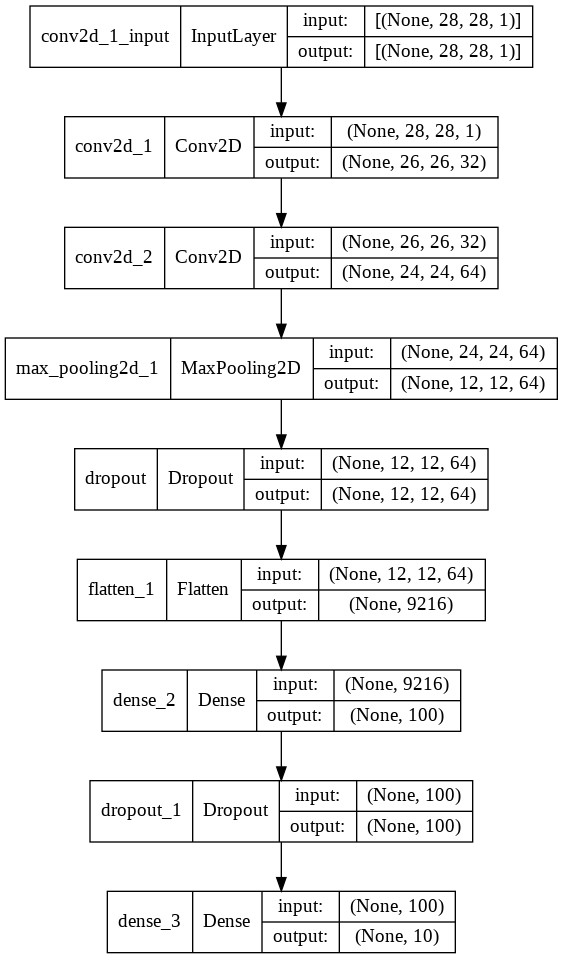

In [61]:
from keras.utils.vis_utils import plot_model
plot_model(NN_model_adv, show_shapes=True, show_layer_names=True)

The model is compiled. 

In [62]:
NN_model_adv.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

The model is trained with training data.

In [63]:
history=NN_model_adv.fit(images_train,
                  labels_train,
                  epochs=25,
                  batch_size=256,
                  validation_data=(images_test,labels_test))

Epoch 1/25
235/235 [==============================] - 7s 25ms/step - loss: 0.3063 - accuracy: 0.9072 - val_loss: 0.0599 - val_accuracy: 0.9803
Epoch 2/25
235/235 [==============================] - 6s 26ms/step - loss: 0.0991 - accuracy: 0.9710 - val_loss: 0.0411 - val_accuracy: 0.9863
Epoch 3/25
235/235 [==============================] - 6s 26ms/step - loss: 0.0721 - accuracy: 0.9779 - val_loss: 0.0398 - val_accuracy: 0.9861
Epoch 4/25
235/235 [==============================] - 6s 24ms/step - loss: 0.0608 - accuracy: 0.9811 - val_loss: 0.0356 - val_accuracy: 0.9878
Epoch 5/25
235/235 [==============================] - 6s 24ms/step - loss: 0.0537 - accuracy: 0.9837 - val_loss: 0.0323 - val_accuracy: 0.9888
Epoch 6/25
235/235 [==============================] - 6s 26ms/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0337 - val_accuracy: 0.9897
Epoch 7/25
235/235 [==============================] - 6s 24ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0306 - val_accuracy: 0.9905

From the graphs below it is possible to see how the new model was able to increase accuracy and decrease the error, then decrease the overfitting.

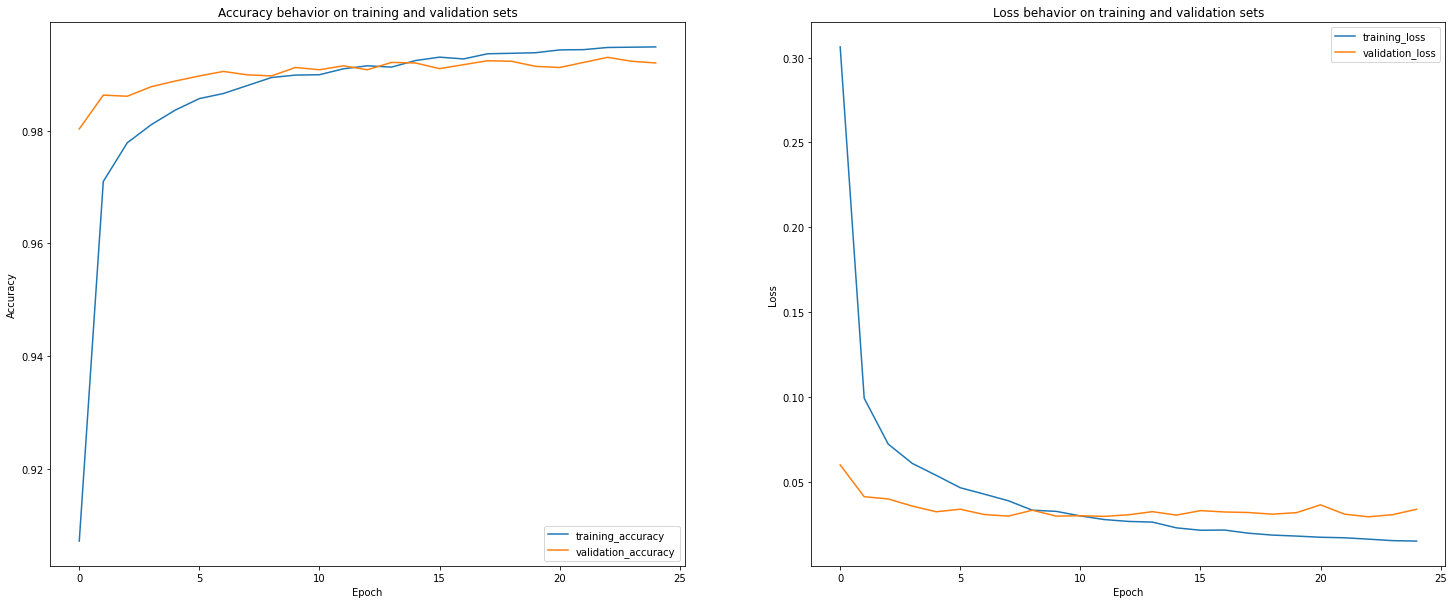

In [64]:
fig=plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["training_accuracy", "validation_accuracy"], loc="lower right")
plt.title('Accuracy behavior on training and validation sets')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend([ "training_loss", "validation_loss"], loc="upper right")
plt.title('Loss behavior on training and validation sets')

plt.show()

I have again generated the confusion matrix and the results (the confused numbers) are in line with the previous models (similar numbers are more likely to be confused).

Accuracy: 0.992


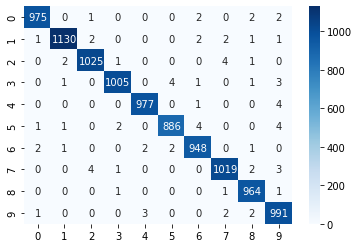

In [65]:
NN_pred_adv = NN_model_adv.predict(images_test)
CNN_pred_adv=list()
CNN_lab_adv=list()
for i in range(len(NN_pred_adv)):
    CNN_pred_adv.append(np.argmax(NN_pred_adv[i]))
for i in range(len(labels_test)):
    CNN_lab_adv.append(np.argmax(labels_test[i]))

CNN_matrix_adv = confusion_matrix(CNN_pred_adv, CNN_lab_adv)
sns.heatmap(CNN_matrix_adv, annot=True, fmt="d", cmap="Blues")
CNN_accuracy_adv=accuracy_score(CNN_pred_adv,CNN_lab_adv)
print('Accuracy:', CNN_accuracy_adv)

### RESULTS SUMMARY AND CONCLUSIONS

In this project I analyzed the MNIST (Modified National Institute of Standards and Technology) dataset using different machine learning methods.
In particular, the dataset is composed of training and testing data of handwritten digits, with which the methods have been trained and evaluated.

Here is a table with the summary of the results, showing the performances achieved by each model:

In [66]:
Accuracy_list=[DT_accuracy_final,RF_accuracy_final,K_accuracy_final,CNN_accuracy_basic,CNN_accuracy_adv]
df_summary=pd.DataFrame(
dict(Method=["Decision Tree","Random Forest","K-nearest Neighbors","Convolutional Neural Network basic","Convolutional Neural Network advanced"],
     Accuracy=Accuracy_list),
columns=["Method", "Accuracy"])
df_summary.style.set_table_styles(
[{'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#eee')]}, 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 {'selector': 'th',
  'props': [('background', '#606060'), 
            ('color', 'white'),
            ('font-family', 'verdana')]},
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},
]
).set_properties(subset=["Method", "Accuracy"],**{'text-align': 'left'}).hide_index()

Method,Accuracy
Decision Tree,0.882200
Random Forest,0.971200
K-nearest Neighbors,0.970500
Convolutional Neural Network basic,0.986200
Convolutional Neural Network advanced,0.992000


As expected, the most performing model turned out to be the one generated with the convolutional neural network, in which overfitting problems were managed in the latest model.

The accuracy levels achieved are in line with those available on the web. 